In [1]:
import sys
sys.path.append('../')

In [6]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
from constants.paths import DATA_RAW, REPORT, DATA_PROCESSED
import matplotlib.pyplot as plt
from constants.dataset import TARGETVAR
from catboost import CatBoostClassifier
%matplotlib inline

In [7]:
train = pd.read_feather(DATA_PROCESSED / 'train_processed.feather')

In [3]:
train, test = pd.read_feather(DATA_RAW / 'train.feather'), pd.read_feather(DATA_RAW / 'test.feather')

In [8]:
train.columns

Index(['area_assesed', 'district_id_x', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'legal_ownership_status', 'count_families',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_ty

In [5]:
train['height_ft_diff'] = train.height_ft_post_eq - train.height_ft_pre_eq

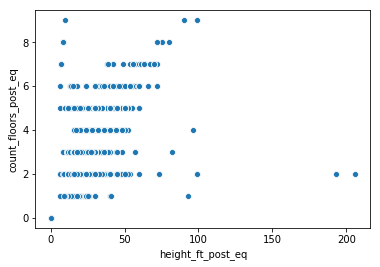

In [23]:
sns.scatterplot(x='height_ft_post_eq', y='count_floors_post_eq', data=train.sample(frac=0.5))

In [9]:
# train_report = ProfileReport(train)
# train_report.to_file(REPORT / 'train_report.html')
# del train_report

In [11]:
# test_report = ProfileReport(test)
# test_report.to_file(REPORT / 'test_report.html')
# del test_report

In [4]:
y = train[TARGETVAR].values
train_len = len(train)
train_test = pd.concat([train.drop(columns=TARGETVAR), test], copy=False)
train_test.reset_index(inplace=True, drop=True)
del train, test

In [7]:
train_test.isna().sum()

building_id                                   0
area_assesed                                  0
district_id_x                                 0
has_geotechnical_risk                         0
has_geotechnical_risk_fault_crack             0
has_geotechnical_risk_flood                   0
has_geotechnical_risk_land_settlement         0
has_geotechnical_risk_landslide               0
has_geotechnical_risk_liquefaction            0
has_geotechnical_risk_other                   0
has_geotechnical_risk_rock_fall               0
has_repair_started                        55339
vdcmun_id_x                                   0
district_id_y                                 0
vdcmun_id_y                                   0
ward_id_x                                     0
legal_ownership_status                        0
count_families                                1
has_secondary_use                             0
has_secondary_use_agriculture                 0
has_secondary_use_hotel                 

In [17]:
# train_test_report = ProfileReport(train_test)
# train_test_report.to_file(REPORT / 'train_test_report.html')
# del train_test_report